In [29]:
#this is an inventory that stores the items, quantity and price of our grocery shop. Currrently we have 10 items stored
inventory={'APPLE':[2034, 2.00],
           'BANANA':[1587, 1.50],
           'ORANGE':[6087, 0.50],
           'AVOCADO':[1404, 2.00],
           'PEPSI':[1980,5.00],
           'CUMCUMBER':[5000, 0.20],
           'CABBAGE':[6737, 1.00],
           'CARROT':[7000, 1.50],
           'CHOCOLATE':[3100, 82.34],
           'MILK':[9243, 5.69]  }
import matplotlib.pyplot as plt
import nltk
nltk.download('words')  # Download the words corpus
from nltk.corpus import words
word_list = words.words()  # Get the list of English words
# this dictionery contains all the alphabets in small case
import pandas as pd 
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import requests
import json
import warnings 
warnings.filterwarnings('ignore')

[nltk_data] Downloading package words to C:\Users\Karandeep
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [15]:
#SHOP NAME: GROUP_2 GROCERY SHOP
#this is the Add item funtion that stores the name, quantity and price of an item to the dictionary
def add_item(name, nitem, price):
    if name not in inventory.keys(): #Thiis statement checks if the item being added is not in the inventory dictionary
        inventory[name]=[nitem, price] #if it doesnt, it stores the name of the item, with its quantity and price
        return " Successfully added the Item"
    else:
        return " The current item already exist" #If the item exist, it return this message 

In [16]:
#this is the update function which allows changes to be made to an item in the inventory 
def update_item(name, nitem,price):
    if name not in inventory.keys(): #This checks if the name of the item, for which its quantity is to be updated, is stored in the inventory
        return " The current Item doesn't exist" #if it doesnt exist, it returns this message
    else:
        inventory[name][0]=nitem #This line is executed if the item exists, then it stores the name with the new quantity (nitem) 
        inventory[name][1]=price # updating the price of the item as well
        return " Item updated successfully"


In [17]:
#Search function is called when the user wants to search for an item by name in the dictionary 
def search_item(name):
    if name in inventory.keys():  # Check if the entered item exists in the inventory dictionary
        return f"Item Found {name} with {inventory[name][0]} quantity"  # Return a message indicating that the item was found, including its name and quantity
    else:
        return "The Item Doesn't exist" # Return a message indicating that the item was not found
    

In [18]:
def remove_item(name):
    if name not in inventory.keys(): # Check if the entered item exists in the inventory dictionary
        return " The entered Item doesn't exist"
    else:
        del inventory[name] # Delete the item from the inventory dictionary
        return "Item Deleted Successfully"


In [19]:
def display_inventory(): #this is the display function which basically store
    print("GROUP_2 GROCERY SHOP")
    print("**********************")
    count=len(inventory.keys())
    for i in sorted(inventory.keys()): # sort the keys of inventory dictionary in alphabetical order
        print(f"Item Name: {i}")
        print(f" Number In stock: {inventory[i][0]}")
        tap=inventory[i][1] # This assign the value of the second element of the tuple associated with the current item to a variable named tap
        print(f"Price Per Item: $%.2f"% tap) # Display the price of the current item with a dollar sign and two decimal places
        print() # Extra line for better readability
    print(f"Total number of Items: - {count}")

In [20]:
def extra():# Saving the inventory file
    inventory1 = dict(sorted(inventory.items()))
    df=pd.DataFrame(inventory1)
    df.to_excel('Inventory.xlsx', index=False)
    print("File saved Successfully as Inventory.xlsx")
    get_inventory_chart()
    get_details()

In [21]:
def get_inventory_chart():
    nitems1 =[v[0] for v in inventory.values()]
    prices = [v[1] for v in inventory.values()]
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(inventory.keys(), prices, width=0.5)
    for i, v in enumerate(nitems1):
        ax.text(i, nitems1[i], '${}'.format(v), ha='center', fontsize=10)
    ax.set_xlabel('Item')
    ax.set_ylabel('Quantity')
    ax.set_title('Inventory')
    plt.xticks(fontsize=8)
    plt.savefig("Inventory.png")
    print("Saved the graph Successfully as Inventory.png")

In [22]:
def get_details():
    with open("Team.txt", "w") as f:
        f.write("\nReddibhathuni Ruchitha-Add/Update Items-$300.\nGurinder Kaur-Update Name/Price of Items-$650.\nRansford Sekyi-Store/Search Items-Display Inventory-$200.\nKarandeep Singh-Export Item Details-$200.\nYedukondalu Annangi-Comparing Prices Online (Web-Scraping)-$220.\nKarandeep Singh-Price Predictor for Items-$900\n")
    print("Details File Saved as Team.txt")

In [27]:
def predict_prices():
    # Here I am using a pseudo data as discussed in the class presentation
    # I will attach the file in the code and one need to replace the file address here in order to predict the data.
    df=pd.read_csv('prices.csv',parse_dates=True,index_col='Month').asfreq('MS')
    a_a=auto_arima(df,stepwise=False,seasonal=True,trace=False,suppress_warnings=True) 
    model=ARIMA(df,order=a_a.order) 
    result=model.fit()
    predicted_values= result.forecast(steps=5)
    print('The Next 5 month predicted values are:-')
    for i in range(5):
        print(predicted_values[i])

In [24]:
def compare_prices(asin):
    url = "https://amazon-product-price-data.p.rapidapi.com/product"
    querystring = {"asins":asin,"locale":"US"}
    headers = { "X-RapidAPI-Key": "99ecbdaf9fmshd0e25a4a5fc49d9p1a20afjsncfcc8ab90ce1",
                "X-RapidAPI-Host": "amazon-product-price-data.p.rapidapi.com"}
    response = requests.request("GET", url, headers=headers, params=querystring)
    dict1=json.loads(response.text)
    return dict1[0]['product_name'] + " "+ "$"+str(dict1[0]['current_price'])

In [31]:
def store(): #this basically displary the menu of our store
    while True:
        print()
        print("MENU")
        print("****************")
        print("1: Add_item")
        print("2: Update_item")
        print("3: Search_item")
        print("4: Remove_item")
        print("5: Display_inventory")
        print("6: Get Inventory File")
        print("7: Predict The prices")
        print("8: Compare the Prices")
        print("9: Quit")
        try:
            option=int(input("Please select an option from the menu: ")) #Allows the user to make a choice between 1 and 6
            print()
        except:
            print("Please make a valid entry") #this pops up if the user enters a wrong input with invalid characters 
            #this option quits the program        
        if option==9:  #this means if the choice entered is equal to 6, the program should quit and return "BYE"
            return "BYE"
            #if the first option is selected, it basically calling the add item funtion store items dictionary    
        elif option==1:  # If the user selects the 'Add item' option
            while True:  # Loop until a valid item name is entered
                name=input("Enter the name of the Item: ") # Get the name of the item from the user and convert it to uppercase
                if name.isalpha()==False:  # Check if the entered name contains only letters
                    print(" Wrong input!!! ") # If the name is not valid, display an error message and ask the user to enter again
                    continue
                elif name not in word_list:
                    print("Entered name Doesn't make sense")
                    continue
                else:
                    name=name.upper()
                    break # If the name is valid, exit the loop and continue
            while True:
                try:
                    nitem=int(input("Enter the number of Items: ")) #asking the user to add the quatity of the item entered previously
                    if nitem.isalnum()==False:
                        print("Input is not a number")
                        continue
                    else:
                        pass
                    if nitem >0: 
                        pass
                    else:
                        print("Wrong Input!!!, the quantity must be more than Zero (0) ") # error message when a negative number is entered
                        continue
                    if not isinstance(nitem,float):
                        print("Items can't be in float")
                        continue
                    break
                except:
                    print(" The input contains an alphabet or special character. Try again") #This pops up if the input contains an alphabet or special character instead of a number
            while True:   
                try:
                    price=float(input("Enter the price of the item: ")) #asking the user to add the price of the item entered previously
                    if nitem.isalnum()==False:
                        print("Input is not a number")
                        continue
                    else:
                        pass
                    
                    if price > 0: #this checks if the entry in terms of price is greater than 0
                        pass
                    else:
                        print("Wrong input!!!, the price cannot be a negative number") #This error message pops up when a negative number is entered
                        continue
                    price = round(price, 2)
                    break
                except:
                    print("Enter the price in decimal format") #This pops up if the input contains an alphabet or special character instead of a number
            added_item=add_item(name, nitem, price)
            print(added_item)
            
            
  #if the second option is selected, this            
        elif option==2:
            while True:
                name=input("Enter the name of the Item: ").upper() #Allows the user to enter the name of the item to update
                if name.isalpha()==False: # Check if the entered name contains only letters
                    print(" Wrong input!!! ") # If the name is not valid, display an error message and ask the user to enter again
                else:
                    break
            while True:
                try:
                    nitem1=int(input("Enter the new number of Items: ")) #Allows user to update the quantity of the item selected
                    if nitem.isalnum()==False:
                        print("Input is not a number")
                        continue
                    else:
                        pass
                    if nitem1 > 0:  #this checks if the entry in terms of quantity is greater than 0
                        pass
                    else:
                        print("Your quantity cannot be less than 0. Try again") #this error pops up if the entry is a negative number
                        continue
                    break
                except:
                    print(" Enter the integer format number") #this error pops up if an alphabet is entered instead of a number
            while True:   
                try:
                    price=float(input("Enter the price of the item: ")) #asking the user to add the price of the item entered previously
                    if nitem.isalnum()==False:
                        print("Input is not a number")
                        continue
                    else:
                        pass
                    if price > 0: #this checks if the entry in terms of price is greater than 0
                        pass
                    else:
                        print("Wrong input!!!, the price cannot be a negative number") #This error message pops up when a negative number is entered
                        continue
                    price = round(price, 2)
                    break
                except:
                    print("Some Error in the Update section of the Menu, Check it.")
            
            item_updated=update_item(name, nitem1,price)
            print(item_updated)
            
#if the third option is selected,the item entered is searched for from the many in the dictionary by calling the search function       
        elif option==3:
            while True:
                name=input("Enter the name of the Item: ").upper() #.Upper() basically converts all inputs into upper case
                if name.isalpha()==False:
                    print(" Wrong Input!!! ")
                else:
                    break     
            searched_item=search_item(name) #search function called with a specific name to search for
            print(searched_item)

            
#if the fourth option is selected, an item is removed from the inventory if it exist by calling the remove function
        elif option==4:
            while True:
                name=input("Enter the name of the Item: ").upper() #.Upper() basically converts all inputs into upper case
                if name.isalpha()==False:
                    print(" Wrong input!!! ") # this error message pops up if theres is a mistake with the entry, if entry contains a number specifically 
                else:
                    break
            removed_item=remove_item(name) #remove function called to delete a specific item by its name from the inventory if it exist
            print(removed_item)

            
# the fifth option is selected, the list of items in the inventry is displayed by calling the display function  
        elif option==5:
            display_inventory() # the display function which shows the number of items stored in it 
        elif option ==6:
            print("You can see the Saved files in your working Directory")
            print("Saving the file in excel format")
            extra()
        elif option ==7:
            print("For This FUnction to work You have To save the prices.csv file in your working directory fpr jupyter notebook")
            print("Predicting the prices")
            predict_prices() 
        elif option ==8:
            print("Comparing the prices online\n")
            # To check whether the function is working or not you can use the example asins 
            asin=input("Enter the product Asin Id from Amazon website: For Example B005YQZ1KE,B074R8RQQ2").upper()
            online_price = compare_prices(asin)
            print(online_price)
        else:
            print("SOME ERROR") #this error message is displayed if the user enteres any other number outside the menu list
     


MENU
****************
1: Add_item
2: Update_item
3: Search_item
4: Remove_item
5: Display_inventory
6: Get Inventory File
7: Predict The prices
8: Compare the Prices
9: Quit
Please select an option from the menu: 6

Saving the file in excel format
File saved Successfully as Inventory.xlsx
Saved the graph Successfully as Inventory.png
Details File Saved as Team.txt

MENU
****************
1: Add_item
2: Update_item
3: Search_item
4: Remove_item
5: Display_inventory
6: Get Inventory File
7: Predict The prices
8: Compare the Prices
9: Quit
Please select an option from the menu: 9



'BYE'

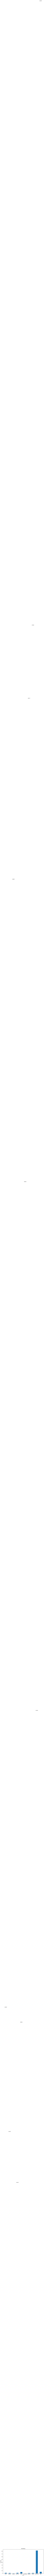

In [33]:
store()